In [1]:
import pymongo
import pandas as pd
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [2]:
params = ['Touches (Att 3rd)',
          'Touches (Att Pen)',
          'Carries into 3rd',
          'Carries into Pen',
          'Shot-Creating Actions',
          'Goal-Creating Actions',
          'Shots',
          'Shots on target',
          'xG']

poland_World_Cup_values = [41.0, 3.0, 1.0, 1.0, 8.0, 0.0, 4.0, 0.0, 0.2]
poland_Euro_values = [81.0, 10.0, 3.0, 2.0, 8.0, 2.0, 5.0, 2.0, 0.55]

low =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
high = [100.0, 15.0, 3.0, 3.0, 10.0, 10.0, 6.0, 6.0, 1.0]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']




In [3]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

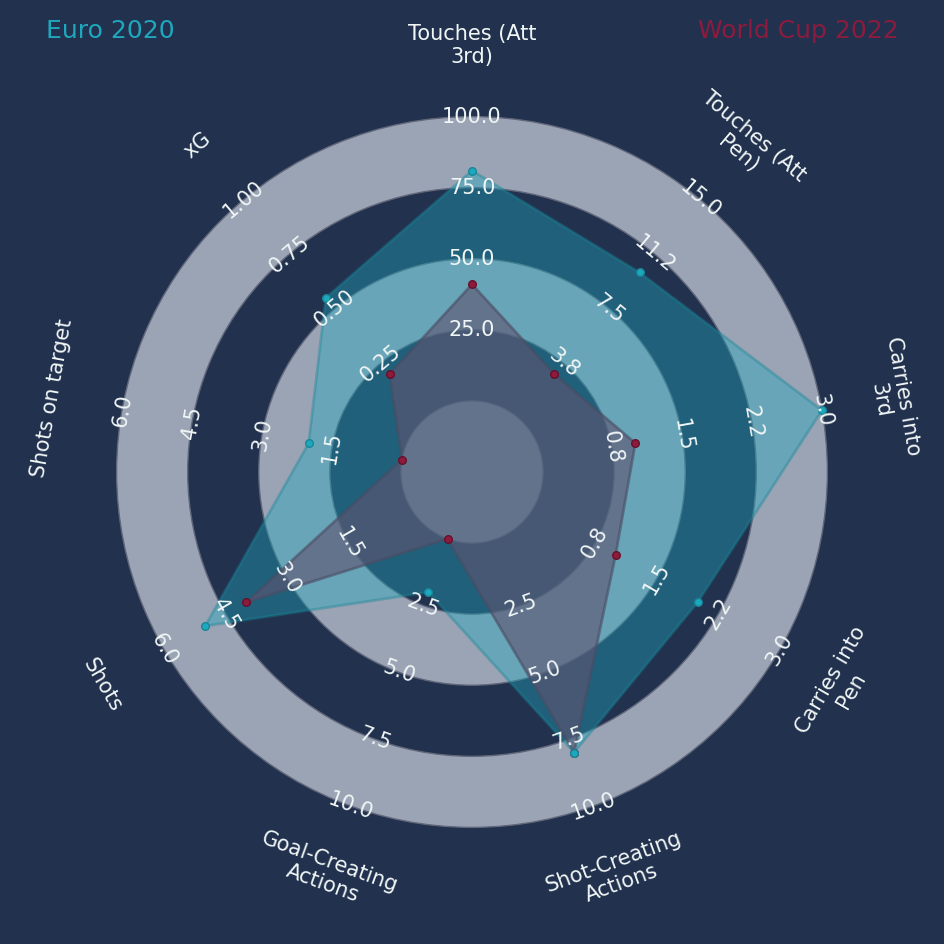

In [4]:
# plot radar
fig, ax = radar.setup_axis(facecolor='#22314E')
rings_inner = radar.draw_circles(ax=ax, facecolor='#9BA4B5', edgecolor='#61677A')
radar_output = radar.draw_radar_compare(poland_World_Cup_values, 
                                        poland_Euro_values, 
                                        ax=ax,
                                        kwargs_radar={'facecolor': '#8D1B3D', 'alpha': 0.6, 'edgecolor': '#67102A', 'lw': 2},
                                        kwargs_compare={'facecolor': '#1EA8BD', 'alpha': 0.4, 'edgecolor': '#188697','lw': 2}
                                        )


radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, color='#f0f6f6')
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, color='#f0f6f6')
fig.set_facecolor('#22314E')

ax.scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#8D1B3D', edgecolors='#67102A', marker='o', s=30, zorder=2)

ax.scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#1EA8BD', edgecolors='#188697', marker='o', s=30, zorder=2)


title2_text = ax.text(-6, 6.2, 'Euro 2020', fontsize=18, color='#1EA8BD', ha='left', va='center')
title3_text = ax.text(6, 6.2, 'World Cup 2022', fontsize=18, color='#8D1B3D', ha='right', va='center')

plt.savefig('Images/offensiveRadar.png')